In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.ticker as mticker

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sat_tools import read_raster_stereographic

In [4]:
%matplotlib inline

In [5]:
filename = '../data/satellite/npp_viirs_m15_20180304_122728_mapping6_500.tif'

im, extent, crs = read_raster_stereographic(filename)

In [6]:
projection = ccrs.Stereographic(central_latitude=68.5, central_longitude=-21)
xticks = list(np.arange(-180, 180, 1))
yticks = list(np.arange(0, 90, 1))

In [10]:
stride = 1

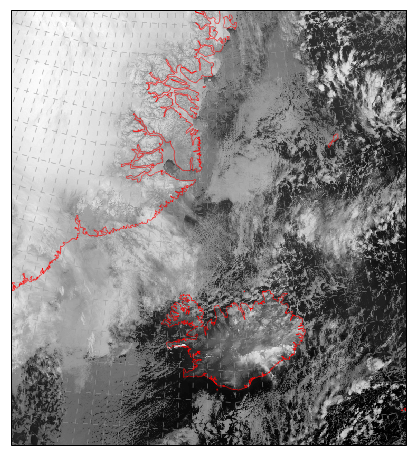

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection=projection)
ax.set_extent([-34, -7.8, 61, 75.2])
ax.coastlines(resolution='10m', color='red', linewidth=0.5)
# fig.canvas.draw()

gl = ax.gridlines(linestyle=(0, (10, 10)), linewidth=0.5, color='#999999')
# ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
# ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

gl.xlocator = mticker.FixedLocator(xticks)
gl.ylocator = mticker.FixedLocator(yticks)

h = ax.imshow(im[::stride, ::stride], origin='upper', extent=extent, transform=crs, cmap='gray', interpolation='nearest')